In [3]:
from library import *
import numpy as np
import sympy as s
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import norm
from matplotlib import interactive
from matplotlib.animation import FuncAnimation
from scipy.stats import norm
import math
import multiprocessing as multiproc
import datetime
from joblib import Parallel, delayed
from numba import jit
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap,TwoSlopeNorm
from IPython.display import display, Math

# one zero

In [4]:

b = 30
c = 1600
m = -0
a_4 = 1*.2
a_3 = -5*.2
a_2 = -3*.2
a_1 = -5*.2
a_0 = -4*.2

modelParameters = [1,1,0.,1,1.,1,a_1,a_2,a_3,a_4, a_0]
parameterNames = ["dimension", "m",'\mu', '\lambda', 'p_0','hbar','a_1','a_2','a_3','a_4','a_0']

one_zero_params = parameters(modelParameters, parameterNames)
initConds = initialConditions(W,p_0, one_zero_params)
one_zero = PhysicalSystem(parameters=one_zero_params,
                                     initialConditions=initConds,
                                     Hamiltonian= asymmetric_Oscillator_H,
                                    HamiltonEquations=asymmetric_Oscillator_H_eq)
ONEZERO = WKB(one_zero, N = 1000, method = 'count', dx = 0.2)
one_zerotrajectories, one_zeropsi_WKB = ONEZERO.psi_eval()

Hamiltonian:


<IPython.core.display.Math object>

Hamilton equations:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Parameters:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

/Users/mo/Documents/Master/internship/Final code/library.py:418: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "density" failed type inference due to: No implementation of function Function(<function norm at 0x102957a30>) found for signature:
 
 >>> norm(float64)
 
There are 2 candidate implementations:
   - Of which 2 did not match due to:
   Overload in function 'norm_impl': File: numba/np/linalg.py: Line 2351.
     With argument(s): '(float64)':
    Rejected as the implementation raised a specific error:
      TypingError: np.linalg.norm() only supported for array types 
  raised from /opt/homebrew/lib/python3.10/site-packages/numba/np/linalg.py:890

During: resolving callee type: Function(<function norm at 0x102957a30>)
During: typing of call at /Users/mo/Documents/Master/internship/Final code/library.py (441)


File "library.py", line 441:
def density(x, t, dx, trajectories):
    <source elided>
                
               

/opt/homebrew/lib/python3.10/site-packages/numba/core/object_mode_passes.py:151: NumbaWarning: Function "density" was compiled in object mode without forceobj=True.

File "library.py", line 437:
def density(x, t, dx, trajectories):
    <source elided>
            #compute the number of particles in a box with side-length dx centred around x 
            position = q[t]  
            ^

  warnings.warn(errors.NumbaWarning(warn_msg,
/opt/homebrew/lib/python3.10/site-packages/numba/core/object_mode_passes.py:161: NumbaDeprecationWarning: 
Fall-back from the nopython compilation path to the object mode compilation path has been detected, this is deprecated behaviour.

For more information visit https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit

File "library.py", line 437:
def density(x, t, dx, trajectories):
    <source elided>
            #compute the number of particles in a box with side-length dx centred aro

<IPython.core.display.Javascript object>


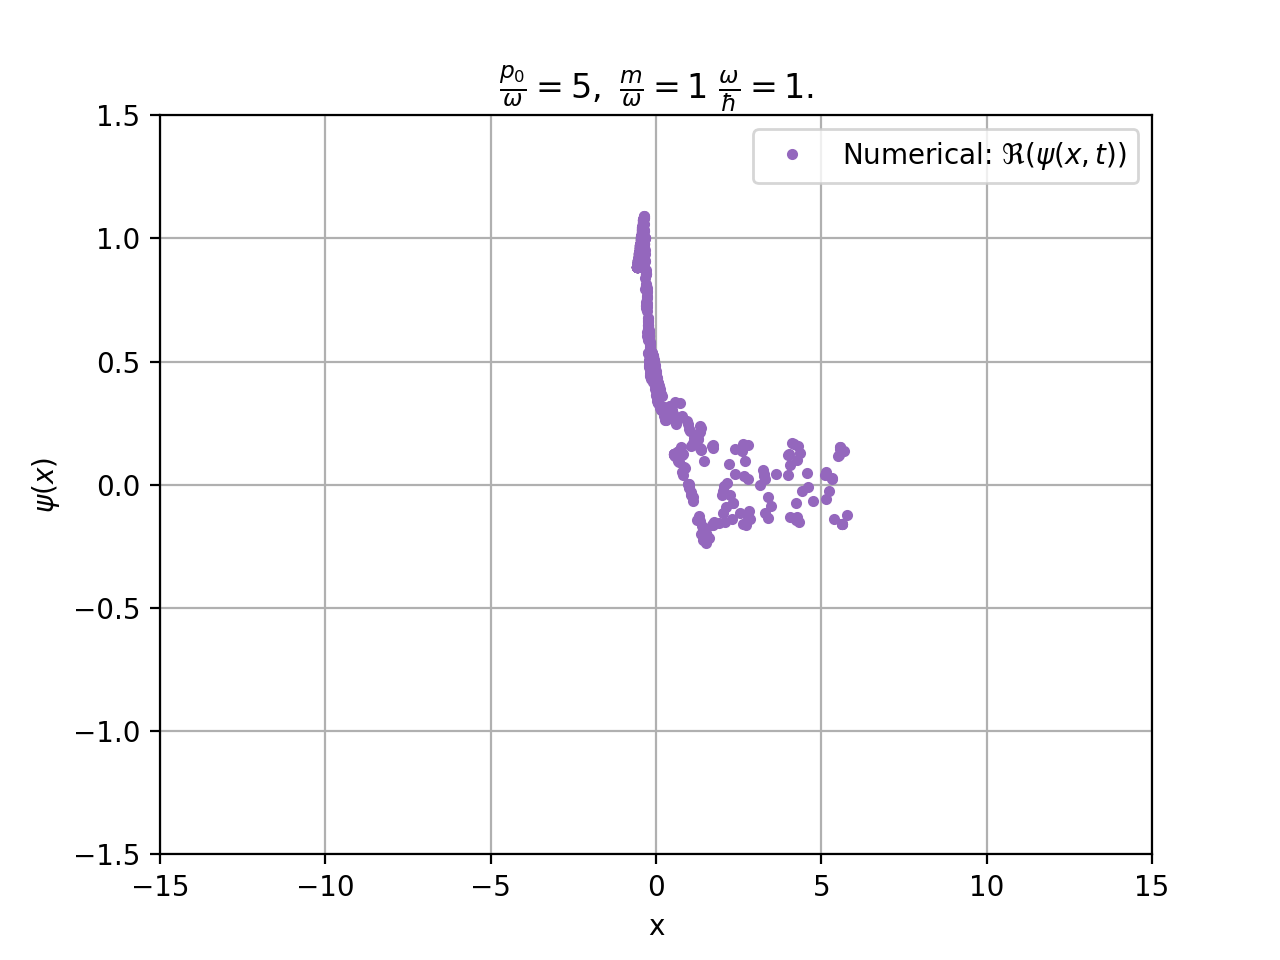

In [5]:
%matplotlib notebook
fig1, ax = plt.subplots()
def animate(i):
    ax.clear()
    ax.set_xlabel("x")
    ax.set_ylabel(r'$\psi(x)$')
    ax.plot(one_zerotrajectories[:,i], np.real(one_zeropsi_WKB[i,:]),  '.', label = r'Numerical: $\Re(\psi(x,t))$', color ='tab:purple')
    ax.grid()
    ax.legend()
    ax.set_xlim(-15,15)
    ax.set_ylim(-1.5,1.5)
    ax.set_title(r'$\frac{p_0}{\omega}=5,$ $\frac{m}{\omega}=1$ $\frac{\omega}{\hbar}=1$.')
ani = FuncAnimation(fig1, animate, frames=int(20/0.01), interval=0.01, repeat=True)
    

# ASHO

In [5]:
# ASHO
minimum_location = 2

a_4 = 1
a_2 = -2*minimum_location**2
a_1 = 0
a_3 = 0
a_0 = minimum_location**4

modelParameters = [1,1.,0.,1,1.,1,a_1,a_2,a_3,a_4, a_0]
parameterNames = ["dimension", "m",'\mu', '\lambda', 'p_0','hbar','a_1','a_2','a_3','a_4','a_0']
symmetric_two_wells_params = parameters(modelParameters, parameterNames)
symmetric_two_wells = PhysicalSystem(parameters=symmetric_two_wells_params,
                                     initialConditions=initConds,
                                     Hamiltonian= asymmetric_Oscillator_H,
                                    HamiltonEquations=asymmetric_Oscillator_H_eq)
ASHO = WKB(symmetric_two_wells, N = 1000, method = 'count', dx = 0.2)
trajectoriesASHO, ASHOpsi_WKB = ASHO.psi_eval()

Hamiltonian:


<IPython.core.display.Math object>

Hamilton equations:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Parameters:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# deeper well

In [6]:
minimum_location = 2.5

a_4 = 1
a_3 = -2*minimum_location
a_2 = 0
a_1 = 2*minimum_location**3
a_0 = -minimum_location**4

modelParameters = [1,1,0.,1,1.,1,a_1,a_2,a_3,a_4, a_0]
parameterNames = ["dimension", "m",'\mu', '\lambda', 'p_0','hbar','a_1','a_2','a_3','a_4','a_0']
deeper_well_params = parameters(modelParameters, parameterNames)
deeper_well = PhysicalSystem(parameters=deeper_well_params,
                                     initialConditions=initConds,
                                     Hamiltonian= asymmetric_Oscillator_H,
                                    HamiltonEquations=asymmetric_Oscillator_H_eq)
DW = WKB(deeper_well,N = 1000, method = 'count', dx = 0.2)
deeper_welltrajectories, deeper_wellpsi_WKB = DW.psi_eval()

Hamiltonian:


<IPython.core.display.Math object>

Hamilton equations:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Parameters:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# save data 

In [8]:
np.save('data/deeper_welltrajectories.npy', deeper_welltrajectories)
np.save('data/deeper_wellpsi_WKB.npy', deeper_wellpsi_WKB)
np.save('data/trajectoriesASHO.npy', trajectoriesASHO)
np.save('data/ASHOpsi_WKB.npy', ASHOpsi_WKB)
np.save('data/one_zerotrajectories.npy', one_zerotrajectories)
np.save('data/one_zeropsi_WKB.npy', one_zeropsi_WKB)